In [1]:
from google.colab import files
uploaded=files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset.shape

(10, 3)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [10]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

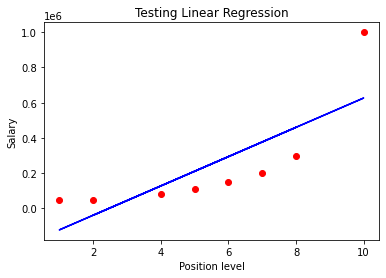

In [11]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Testing Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
# Model Evaluation
# Importing metrics library
from sklearn import metrics
# Evaluating the model and printing the value of MAE
print('Mean Absolute Error')
print(metrics.mean_absolute_error(y_test, y_pred))
# Evaluating the model and printing the value of MSE
print('Mean Square Error')
print(metrics.mean_squared_error(y_test, y_pred))
# Evaluating the model and printing the value of RMSE
print('Root Mean Square Error')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error
29598.82583170262
Mean Square Error
1068599327.5148352
Root Mean Square Error
32689.43755274531


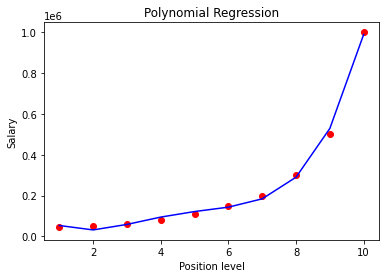

In [13]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

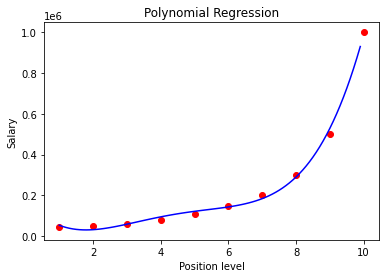

In [14]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [15]:
# Predicting a new result with Linear Regression
x=float(input('Enter a position level:- '))
regressor.predict([[x]])

Enter a position level:- 5.7


array([268914.87279843])

In [16]:
# Predicting a new result with Polynomial Regression
x=float(input('Enter a position level:- '))
lin_reg_2.predict(poly_reg.fit_transform([[x]]))

Enter a position level:- 5.7


array([136334.19157928])